In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part One

In [13]:
# read dataset
delta_t = 0.1
x0_df = pd.read_csv('datasets/linear_vectorfield_data_x0.txt',delim_whitespace=True, names=["x0", "y0"])
x0_data = np.array(x0_df,dtype=float)
x1_df = pd.read_csv('datasets/linear_vectorfield_data_x1.txt',delim_whitespace=True, names=["x0", "y0"])
x1_data = np.array(x1_df,dtype=float)
v_data = (x1_data - x0_data) / delta_t

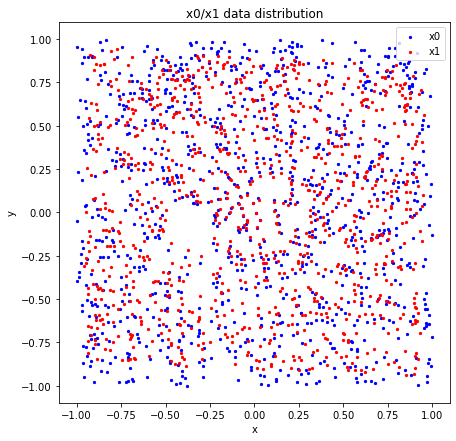

In [14]:
# plot x0 and x1
fig1 = plt.figure(figsize=(7,7))
ax1 = fig1.add_subplot()
ax1.scatter(x0_data[:,0], x0_data[:, 1], c='b', s=5, label='x0')
ax1.scatter(x1_data[:,0], x1_data[:, 1], c='r', s=5, label="x1")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("x0/x1 data distribution")
ax1.legend()

Text(0.5, 1.0, 'flow using the finite-difference formula')

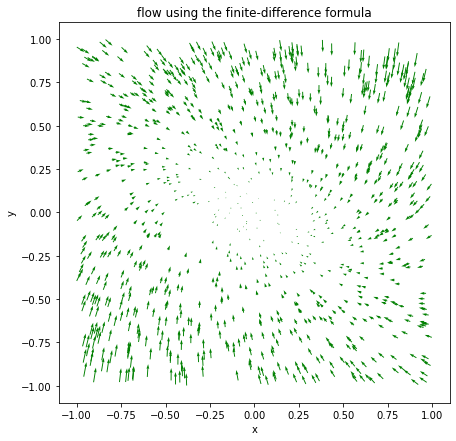

In [15]:
# plot flow using the finite-difference formula
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.quiver(x0_data[:,0], x0_data[:, 1], v_data[:,0], v_data[:, 1], color='g')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("flow using the finite-difference formula")

## Part Two

In [16]:
# get approximated A
nr = x0_data.shape[0]
# concat 1 as bias
# x0_data_concat = np.concatenate((x0_data, np.ones(nr).reshape(nr,1)), axis = -1)
A = np.linalg.lstsq(x0_data, v_data, rcond=None)[0]

In [17]:
eq = lambda t, x: A @ x
x1_sol = np.zeros((nr, 2))
for i in range(nr):
    x1_sol[i, :] = solve_ivp(eq, t_span=[0, 0.2], t_eval=[0.1], y0=x0_data[i, :]).y.reshape(-1)

In [18]:
# mse loss
np.mean(np.sum((x1_sol - x1_data)**2, axis = -1))

0.003059927639744227

Text(0.5, 1.0, 'predicted flow')

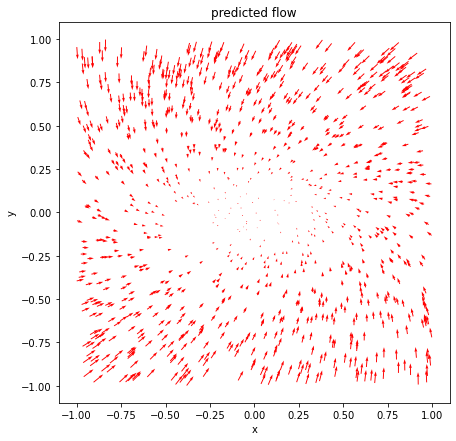

In [19]:
# plot predicted flow using ivp solver
v_sol = x1_sol - x0_data
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot()
ax2.quiver(x0_data[:,0], x0_data[:, 1], v_sol[:,0], v_sol[:, 1], color='r')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("predicted flow")

## Part Three

In [20]:
sol = solve_ivp(eq, t_span=[0, 100], t_eval=np.arange(0,100,0.1), y0=np.array([10,10]))

Text(0.5, 1.0, 'trajectory')

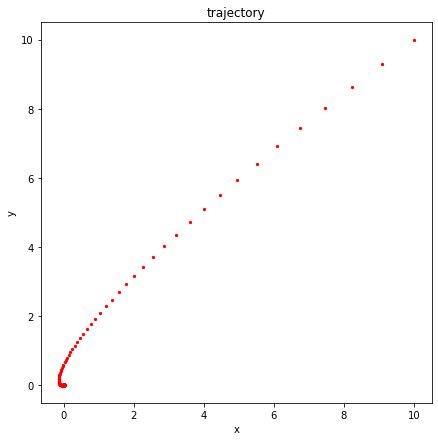

In [21]:
# plot trajectory
fig3 = plt.figure(figsize=(7,7))
ax3 = fig3.add_subplot()
ax3.scatter(sol.y[0, :], sol.y[1, :], s=5, color='r')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("trajectory")

Text(0.5, 1.0, 'trajectory and phase portrait')

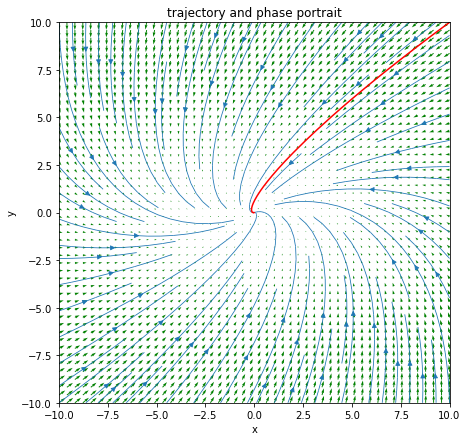

In [22]:
# plot predicted plot, plot stream and plot trajectory
x, y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
u, v = np.zeros_like(x), np.zeros_like(y)


u = A[0][0] * x + A[0][1] * y
v = A[1][0] * x + A[1][1] * y

fig4 = plt.figure(figsize=(7,7))
ax4 = fig4.add_subplot()
ax4.quiver(x, y, u, v, color='g')
ax4.streamplot(x, y, u, v, linewidth=0.8)
ax4.plot(sol.y[0, :], sol.y[1, :], c='r')
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("trajectory and phase portrait")